In [3]:
#Instalar módulos necessários
!pip install Pyspark
!pip install pandas
!pip install sklearn
!pip install -U scikit-learn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2369 sha256=b5247a1d9a0255a9628fb847c982cf8adaf44457f3d13f783851bfbabf0b3b6f
  Stored in directory: /home/paulo/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Importar bibliotecas a serem usadas
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from pyspark.sql               import SparkSession
from pyspark.ml.feature        import VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation     import MulticlassClassificationEvaluator
from sklearn.datasets          import load_iris
from sklearn.metrics           import confusion_matrix

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#Iniciar sessão spark
spark=SparkSession.builder.getOrCreate()


In [7]:
#Importar e exibir detalhes do dataset
iris = load_iris(as_frame=True)
iris = iris.frame
iris = spark.createDataFrame(iris)

print('Dataset completo')
iris.show()

print('Schema do dataset')
iris.printSchema()

print('Colunas do dataset')
iris.columns

/home/paulo/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


Dataset completo


+-----------------+----------------+-----------------+----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|
+-----------------+----------------+-----------------+----------------+------+
|              5.1|             3.5|              1.4|             0.2|     0|
|              4.9|             3.0|              1.4|             0.2|     0|
|              4.7|             3.2|              1.3|             0.2|     0|
|              4.6|             3.1|              1.5|             0.2|     0|
|              5.0|             3.6|              1.4|             0.2|     0|
|              5.4|             3.9|              1.7|             0.4|     0|
|              4.6|             3.4|              1.4|             0.3|     0|
|              5.0|             3.4|              1.5|             0.2|     0|
|              4.4|             2.9|              1.4|             0.2|     0|
|              4.9|             3.1|              1.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [8]:
#Definir features principais
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
featureassembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

output = featureassembler.transform(iris)
output.show()

+-----------------+----------------+-----------------+----------------+------+--------------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|            features|
+-----------------+----------------+-----------------+----------------+------+--------------------+
|              5.1|             3.5|              1.4|             0.2|     0|[5.1,3.5,1.4,0.2,...|
|              4.9|             3.0|              1.4|             0.2|     0|[4.9,3.0,1.4,0.2,...|
|              4.7|             3.2|              1.3|             0.2|     0|[4.7,3.2,1.3,0.2,...|
|              4.6|             3.1|              1.5|             0.2|     0|[4.6,3.1,1.5,0.2,...|
|              5.0|             3.6|              1.4|             0.2|     0|[5.0,3.6,1.4,0.2,...|
|              5.4|             3.9|              1.7|             0.4|     0|[5.4,3.9,1.7,0.4,...|
|              4.6|             3.4|              1.4|             0.3|     0|[4.6,3.4,1.4,0.3,...|


In [9]:
#Dividir features e target em conjuntos de treino e teste
modeldata=output.select('Features','target')
train_data,test_data=modeldata.randomSplit([0.75,0.25])

print('Dados de treino')
train_data.show()

print('Dados de teste')
test_data.show()

Dados de treino
+--------------------+------+
|            Features|target|
+--------------------+------+
|[4.3,3.0,1.1,0.1,...|     0|
|[4.4,2.9,1.4,0.2,...|     0|
|[4.4,3.2,1.3,0.2,...|     0|
|[4.5,2.3,1.3,0.3,...|     0|
|[4.6,3.1,1.5,0.2,...|     0|
|[4.6,3.2,1.4,0.2,...|     0|
|[4.6,3.4,1.4,0.3,...|     0|
|[4.6,3.6,1.0,0.2,...|     0|
|[4.7,3.2,1.6,0.2,...|     0|
|[4.8,3.0,1.4,0.1,...|     0|
|[4.8,3.0,1.4,0.3,...|     0|
|[4.9,3.1,1.5,0.2,...|     0|
|[4.9,3.6,1.4,0.1,...|     0|
|[5.0,3.0,1.6,0.2,...|     0|
|[5.0,3.3,1.4,0.2,...|     0|
|[5.0,3.4,1.5,0.2,...|     0|
|[5.0,3.5,1.3,0.3,...|     0|
|[5.0,3.5,1.6,0.6,...|     0|
|[5.0,3.6,1.4,0.2,...|     0|
|[5.1,3.3,1.7,0.5,...|     0|
+--------------------+------+
only showing top 20 rows

Dados de teste
+--------------------+------+
|            Features|target|
+--------------------+------+
|[4.4,3.0,1.3,0.2,...|     0|
|[4.7,3.2,1.3,0.2,...|     0|
|[4.8,3.1,1.6,0.2,...|     0|
|[4.8,3.4,1.6,0.2,...|     0|
|[4.8,3.4,1.9

In [10]:
#Criar modelo de classificação Naive Bayes
nb = NaiveBayes(featuresCol='Features', labelCol='target')
nb=nb.fit(train_data)

#Predição e matriz de confusão
y_pred = nb.transform(test_data)

print('Predição')
y_pred.show()

print('Matriz de confusão')
y_pred.groupBy('target', 'prediction').count()
pred=y_pred.select("prediction").collect()
orig=y_pred.select("target").collect()
print(confusion_matrix(orig, pred))

Predição
+--------------------+------+--------------------+--------------------+----------+
|            Features|target|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[4.4,3.0,1.3,0.2,...|     0|[-10.804703102257...|[0.79142488578750...|       0.0|
|[4.7,3.2,1.3,0.2,...|     0|[-11.235125020098...|[0.82417363162310...|       0.0|
|[4.8,3.1,1.6,0.2,...|     0|[-11.783344833029...|[0.78614058573924...|       0.0|
|[4.8,3.4,1.6,0.2,...|     0|[-12.109004665000...|[0.81742311315518...|       0.0|
|[4.8,3.4,1.9,0.2,...|     0|[-12.694672634190...|[0.78503941327652...|       0.0|
|[4.9,3.0,1.4,0.2,...|     0|[-11.355451363977...|[0.80193207574276...|       0.0|
|[4.9,3.1,1.5,0.1,...|     0|[-11.295525906333...|[0.82065437424569...|       0.0|
|[5.0,3.2,1.2,0.2,...|     0|[-11.253217726895...|[0.84449867259073...|       0.0|
|[5.0,3.4,1.6,0.4,...|     0|[-12.978617689858...|[0.78631939770656...|       

In [11]:
#Construir avaliador e exibir a acurácia
evaluator = MulticlassClassificationEvaluator(labelCol='target', predictionCol='prediction')
accuracy = evaluator.evaluate(y_pred)
accuracy

0.9764562922457659

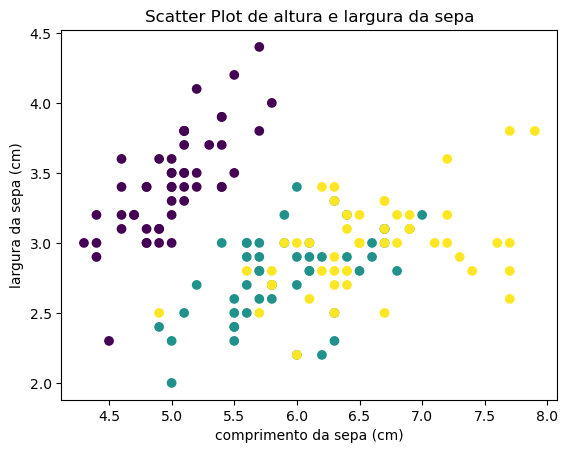

In [12]:
#Construir visualizações

#Montar dataset pandas
pandas_df = iris.toPandas()

#Gráfico de dispersão de altura e largura da sepa
plt.scatter(pandas_df['sepal length (cm)'], pandas_df['sepal width (cm)'], c=pandas_df['target'])
plt.xlabel('comprimento da sepa (cm)')
plt.ylabel('largura da sepa (cm)')
plt.title('Scatter Plot de altura e largura da sepa')
plt.show()